# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install citipy

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


In [11]:
#cities

---

In [12]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}&q=san francisco"
print(url)

https://api.openweathermap.org/data/2.5/weather?units=metric&appid=f2f3c27860a37bda41679a3884e6039d&q=san francisco


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dalai
Processing Record 2 of Set 1 | saipan
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | jose mariano jimenez
City not found. Skipping...
Processing Record 6 of Set 1 | ascencion de guarayos
City not found. Skipping...
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | xining
Processing Record 10 of Set 1 | callao
Processing Record 11 of Set 1 | fort bragg
Processing Record 12 of Set 1 | teknaf
Processing Record 13 of Set 1 | martuk
Processing Record 14 of Set 1 | constantia
Processing Record 15 of Set 1 | vorgashor
Processing Record 16 of Set 1 | tolanaro
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | chibougamau
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | fenoarivo be
Processing 

Processing Record 39 of Set 4 | souillac
Processing Record 40 of Set 4 | primero de mayo
Processing Record 41 of Set 4 | porto novo
Processing Record 42 of Set 4 | howrah
Processing Record 43 of Set 4 | sisimiut
Processing Record 44 of Set 4 | vilyuysk
Processing Record 45 of Set 4 | mormugao
Processing Record 46 of Set 4 | jasper
Processing Record 47 of Set 4 | bamboo flat
Processing Record 48 of Set 4 | jackson
Processing Record 49 of Set 4 | east london
Processing Record 0 of Set 5 | port lincoln
Processing Record 1 of Set 5 | tuban
Processing Record 2 of Set 5 | sarakhs
Processing Record 3 of Set 5 | san patricio
Processing Record 4 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 5 of Set 5 | morehead city
Processing Record 6 of Set 5 | taldykorgan
Processing Record 7 of Set 5 | west island
Processing Record 8 of Set 5 | troitsko-pechorsk
Processing Record 9 of Set 5 | villa regina
Processing Record 10 of Set 5 | polyarnyy
Processing Record 11 of Set 5 | atafu vill

Processing Record 31 of Set 8 | bonthe
Processing Record 32 of Set 8 | boden
Processing Record 33 of Set 8 | madang
Processing Record 34 of Set 8 | fortuna
Processing Record 35 of Set 8 | vadso
Processing Record 36 of Set 8 | carthage
Processing Record 37 of Set 8 | port alfred
Processing Record 38 of Set 8 | okondja
Processing Record 39 of Set 8 | adolfo lopez mateos (el tamarindo)
City not found. Skipping...
Processing Record 40 of Set 8 | cam ranh
Processing Record 41 of Set 8 | kailua-kona
Processing Record 42 of Set 8 | ulaangom
Processing Record 43 of Set 8 | princeville
Processing Record 44 of Set 8 | itoman
Processing Record 45 of Set 8 | rongelap
Processing Record 46 of Set 8 | piripiri
Processing Record 47 of Set 8 | manapparai
Processing Record 48 of Set 8 | shantobe
Processing Record 49 of Set 8 | bad konig
Processing Record 0 of Set 9 | tateyama
Processing Record 1 of Set 9 | arang
Processing Record 2 of Set 9 | lazaro cardenas
Processing Record 3 of Set 9 | kargasok
Proce

Processing Record 17 of Set 12 | keren
Processing Record 18 of Set 12 | gaigeturi
Processing Record 19 of Set 12 | jincheng
Processing Record 20 of Set 12 | posto fiscal rolim de moura
Processing Record 21 of Set 12 | puerto aysen
Processing Record 22 of Set 12 | jilib
Processing Record 23 of Set 12 | rio gallegos
Processing Record 24 of Set 12 | bucerias
Processing Record 25 of Set 12 | vallenar
Processing Record 26 of Set 12 | mahdia
Processing Record 27 of Set 12 | qarauyl
Processing Record 28 of Set 12 | constitucion
Processing Record 29 of Set 12 | aripuana
Processing Record 30 of Set 12 | laojunmiao
Processing Record 31 of Set 12 | arno
Processing Record 32 of Set 12 | tobelo
Processing Record 33 of Set 12 | tari
Processing Record 34 of Set 12 | helena
Processing Record 35 of Set 12 | san luis de la loma
Processing Record 36 of Set 12 | les avirons
Processing Record 37 of Set 12 | uliastay
Processing Record 38 of Set 12 | campbell river
Processing Record 39 of Set 12 | al muwayh


In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dalai,45.5000,124.3000,14.95,82,75,2.42,CN,1695029689
1,saipan,15.1355,145.7010,28.39,83,40,5.66,MP,1695029690
2,waitangi,-43.9535,-176.5597,11.01,79,11,5.81,NZ,1695029690
3,kavieng,-2.5744,150.7967,26.96,75,100,1.72,PG,1695029690
4,port-aux-francais,-49.3500,70.2167,4.68,88,78,9.90,TF,1695029691
...,...,...,...,...,...,...,...,...,...
574,jinjiang,24.8198,118.5741,28.12,73,32,2.20,CN,1695029929
575,nushki,29.5542,66.0215,36.53,8,2,4.64,PK,1695029929
576,montepuez,-13.1256,38.9997,32.23,21,11,3.58,MZ,1695029930
577,jaffa,32.0504,34.7522,32.34,65,0,2.57,IL,1695029930


In [27]:
#Show Record Rount
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dalai,45.5000,124.3000,14.95,82,75,2.42,CN,1695029689
1,saipan,15.1355,145.7010,28.39,83,40,5.66,MP,1695029690
2,waitangi,-43.9535,-176.5597,11.01,79,11,5.81,NZ,1695029690
3,kavieng,-2.5744,150.7967,26.96,75,100,1.72,PG,1695029690
4,port-aux-francais,-49.3500,70.2167,4.68,88,78,9.90,TF,1695029691


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dalai,45.5000,124.3000,14.95,82,75,2.42,CN,1695029689
1,saipan,15.1355,145.7010,28.39,83,40,5.66,MP,1695029690
2,waitangi,-43.9535,-176.5597,11.01,79,11,5.81,NZ,1695029690
3,kavieng,-2.5744,150.7967,26.96,75,100,1.72,PG,1695029690
4,port-aux-francais,-49.3500,70.2167,4.68,88,78,9.90,TF,1695029691


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

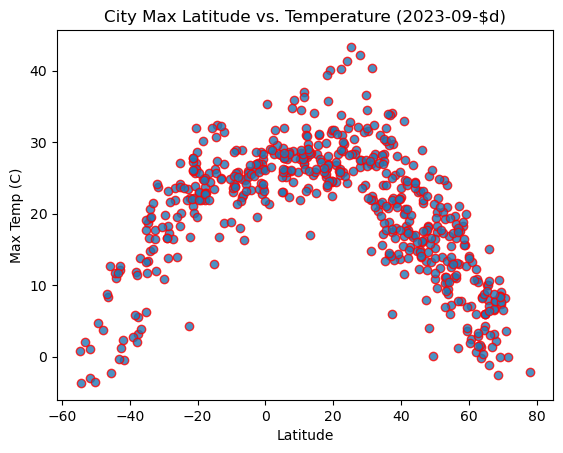

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="red",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
date = time.strftime("%Y-%m-$d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

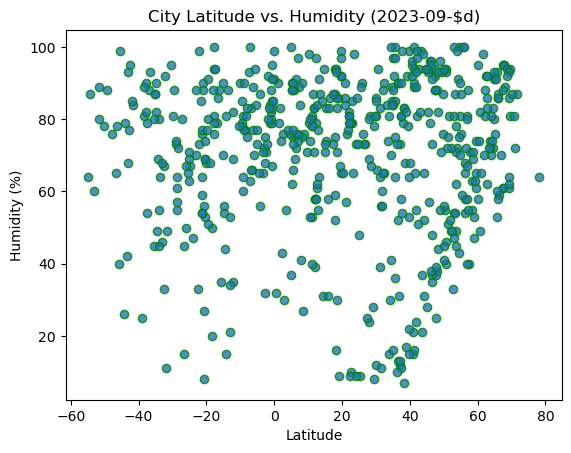

In [39]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="green",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
date = time.strftime("%Y-%m-$d")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

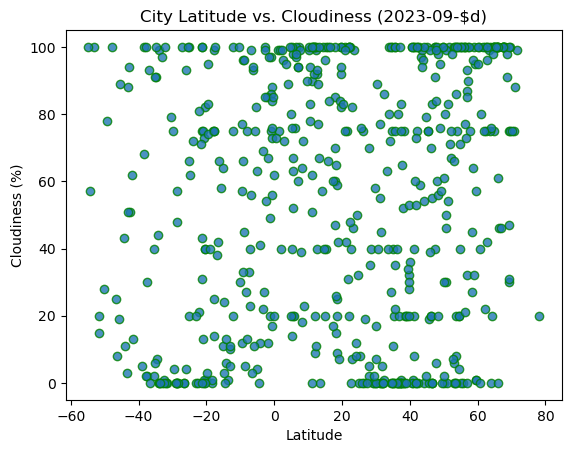

In [40]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="green",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
date = time.strftime("%Y-%m-$d")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

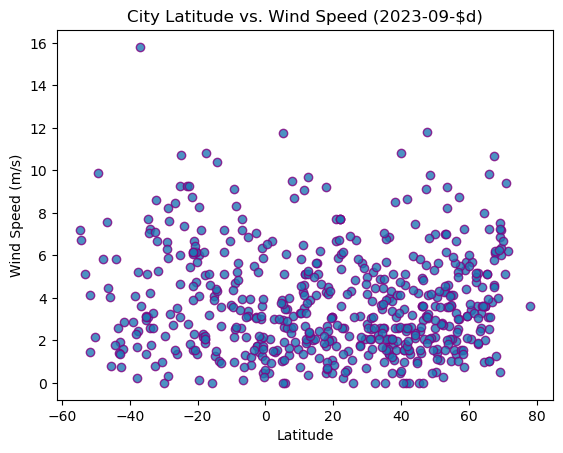

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="purple",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties
date = time.strftime("%Y-%m-$d")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_value, y_value, title, text_coord):
    
    #compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = (x_value * slope) + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dalai,45.5000,124.3000,14.95,82,75,2.42,CN,1695029689
1,saipan,15.1355,145.7010,28.39,83,40,5.66,MP,1695029690
5,tiksi,71.6872,128.8694,-0.07,87,99,6.22,RU,1695029692
6,xining,36.6167,101.7667,18.85,52,80,6.86,CN,1695029692
8,fort bragg,35.1390,-79.0060,18.75,97,40,2.57,US,1695029693


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,11.01,79,11,5.81,NZ,1695029690
3,kavieng,-2.5744,150.7967,26.96,75,100,1.72,PG,1695029690
4,port-aux-francais,-49.3500,70.2167,4.68,88,78,9.90,TF,1695029691
7,callao,-12.0667,-77.1500,18.73,82,100,5.14,PE,1695029634
13,tolanaro,-25.0319,46.9987,27.04,69,20,9.26,MG,1695029696


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.6346877670439474


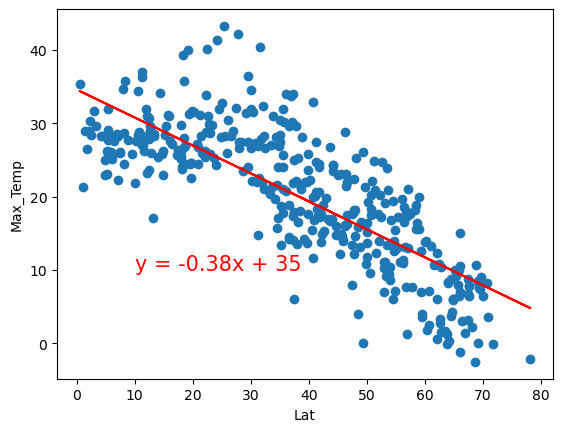

In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max_Temp", (10, 10))

The r-value is 0.6242312526525865


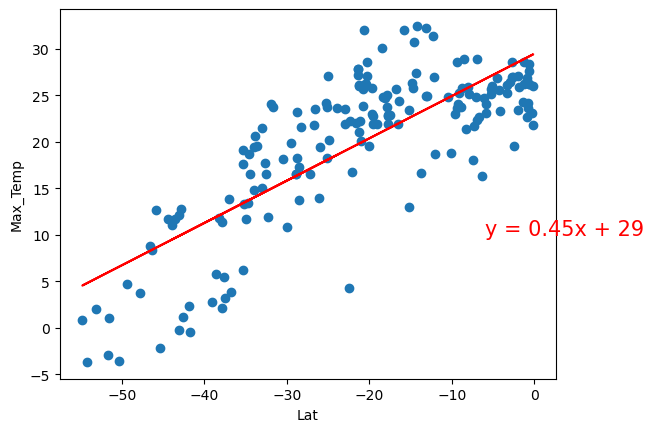

In [53]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max_Temp", (-6, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.002201651334887591


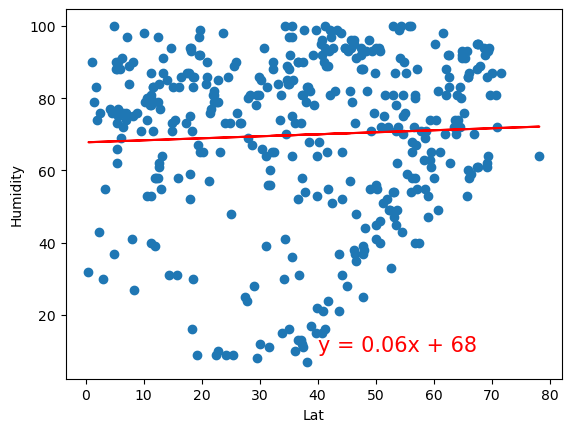

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (40, 10))

The r-value is: 0.0002808747046324607


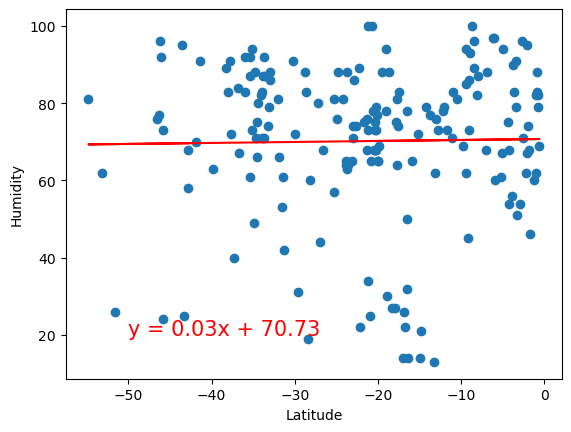

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (40, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0013786620007438482


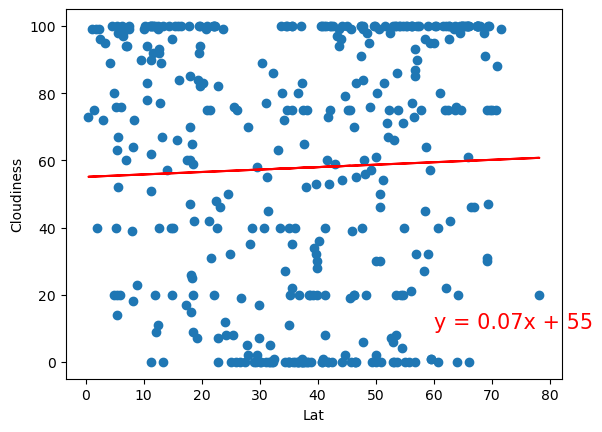

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (60, 10))

The r-value is 0.008523476825221367


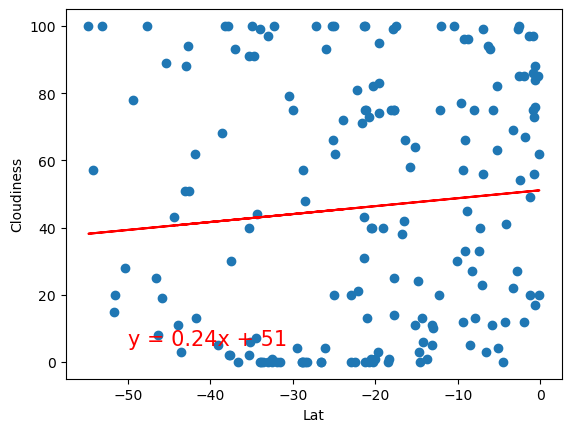

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-50, 5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.01659173935924274


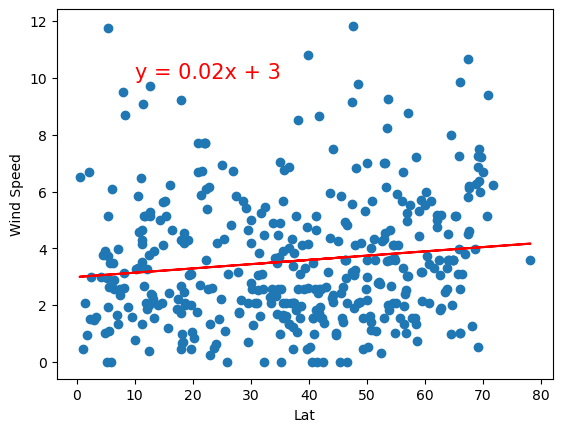

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 10))

The r-value is: 0.062239040700515696


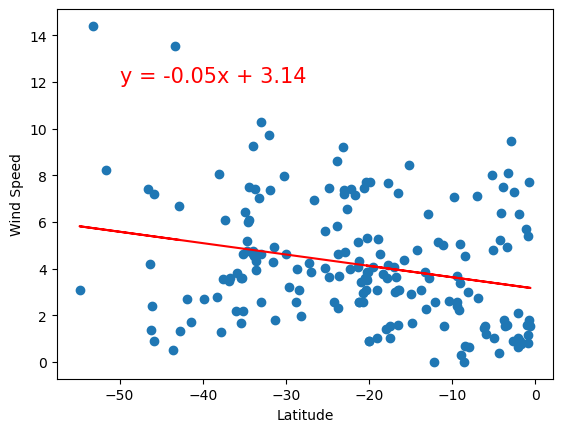

In [22]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (40, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE